In [1]:
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mnorm

In [2]:
train = pd.read_csv('R:/IISc/Sem 2/PRNN/Assignments/assignment-1-data-sets/P1a_train_data_2D.txt', header=None)

In [3]:
D = 2

In [4]:
train = train.rename(columns={D: "y"})
train.head()

,0,1,y
0,0.7177,-2.1138,1
1,0.6259,1.6304,1
2,1.7229,1.6341,1
3,0.9462,0.8236,1
4,-0.4696,-0.3449,1


In [5]:
# train = train.sample(5)

In [6]:
total = len(train.index)
p0 = train[train.y == -1].shape[0]/total
p1 = train[train.y == 1].shape[0]/total
print(total, p0, p1)

200 0.5 0.5


In [7]:
mu0 = np.array(train.groupby('y').mean().loc[-1])
mu1 = np.array(train.groupby('y').mean().loc[1])
sigma0 = np.array(train.groupby('y').cov().loc[-1])
sigma1 = np.array(train.groupby('y').cov().loc[1])
mu0 = mu0.reshape((D, 1))
mu1 = mu1.reshape((D, 1))
sigma0 = sigma0.reshape((D, D))
sigma1 = sigma1.reshape((D, D))

In [8]:
print(mu0)
print(mu1)
print(sigma0)
print(sigma1)

[[1.266357]
 [1.044601]]
[[0.158858]
 [0.245269]]
[[0.9100869  0.04004571]
 [0.04004571 1.51371113]]
[[1.01620853 0.45351858]
 [0.45351858 1.014597  ]]


In [9]:
def exponential_prob(x, mu, d):
    value = (1/mu[0][0])*(1/mu[1][0])*math.exp(np.dot(x, 1/mu))
    return value

def gaussian_prob(x, mu, sigma, d):
    xx = np.matmul(x-mu, np.linalg.inv(sigma))
    power = (-1/2)* np.matmul(np.matmul(x-mu, np.linalg.inv(sigma)), (x-mu).T)
    det = abs(np.linalg.det(sigma))
    value = (1/math.sqrt((2*math.pi)**d * det))* np.exp(power)
    return value[0][0]

def prediction(posterior_0, posterior_1):
    if posterior_0 > posterior_1:
        return -1
    else:
        return 1

In [10]:
train['posterior_0'] = train.apply(lambda row: p0 * gaussian_prob(np.array(row[0:D]), mu0, sigma0, D), axis=1)
# train['posterior_0'] = train.apply(lambda row: p0 * exponential_prob(np.array(row[0:D]), mu0, D), axis=1)
train['posterior_1'] = train.apply(lambda row: p1 * gaussian_prob(np.array(row[0:D]), mu1, sigma1, D), axis=1)
train['predicted'] = train.apply(lambda row: prediction(row.posterior_0, row.posterior_1), axis=1)

In [11]:
train.head()

,0,1,y,posterior_0,posterior_1,predicted
0,0.7177,-2.1138,1,0.001387,0.001497,1
1,0.6259,1.6304,1,0.051465,0.029465,-1
2,1.7229,1.6341,1,0.058129,0.018123,-1
3,0.9462,0.8236,1,0.060344,0.060778,1
4,-0.4696,-0.3449,1,0.005944,0.069943,1


In [12]:
y = train.iloc[:, [D]]
y_pred = train.iloc[:, [-1]]

In [13]:
predictions_train = np.array(y_pred) == np.array(y)

In [14]:
true_count = (predictions_train[:, 0] == True).sum()
false_count = (predictions_train[:, 0] == False).sum()
accuracy = true_count/(total) * 100
print(true_count, false_count)
print('Accuracy = ' + str(accuracy) + '%')

152 48
Accuracy = 76.0%


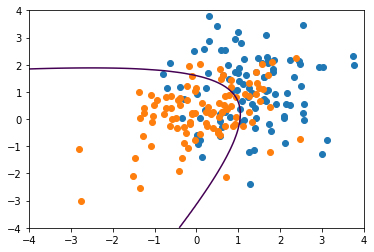

In [15]:
x0 = train[train['y'] == -1][0]
y0 = train[train['y'] == -1][1]
plt.scatter(x0, y0)
x1 = train[train['y'] == 1][0]
y1 = train[train['y'] == 1][1]
plt.scatter(x1, y1)

X, Y = np.mgrid[-4:4:100j, -4:4:100j]
x = X.ravel()
y = Y.ravel()
p = (mnorm(mu1.T[0], sigma1).pdf(np.column_stack((x, y))) - mnorm(mu0.T[0], sigma0).pdf(np.column_stack((x, y)))).reshape(X.shape)
plt.contour(X, Y, p, levels = [0])

In [16]:
test = pd.read_csv('R:/IISc/Sem 2/PRNN/Assignments/assignment-1-data-sets/P1a_test_data_2D.txt', header=None)

In [17]:
test = test.rename(columns={D: "y"})
test.head()

,0,1,y
0,0.0590,0.4532,1
1,-1.2340,-0.1377,1
2,1.1535,1.1037,1
3,-0.6642,1.4021,1
4,0.8231,-0.6175,1


Bayes Classifier on Test Set

In [18]:
test['posterior_0'] = test.apply(lambda row: p0 * gaussian_prob(np.array(row[0:D]), mu0, sigma0, D), axis=1)
# test['posterior_0'] = test.apply(lambda row: p0 * exponential_prob(np.array(row[0:D]), mu0, D), axis=1)
test['posterior_1'] = test.apply(lambda row: p1 * gaussian_prob(np.array(row[0:D]), mu1, sigma1, D), axis=1)
test['predicted'] = test.apply(lambda row: prediction(row.posterior_0, row.posterior_1), axis=1)

In [19]:
total = len(test.index)
y = test.iloc[:, [D]]
y_pred = test.iloc[:, [-1]]

In [20]:
predictions_test = np.array(y_pred) == np.array(y)

In [21]:
true_count = (predictions_test[:, 0] == True).sum()
false_count = (predictions_test[:, 0] == False).sum()
accuracy = true_count/(total) * 100
print(true_count, false_count)
print('Accuracy = ' + str(accuracy) + '%')

153 47
Accuracy = 76.5%


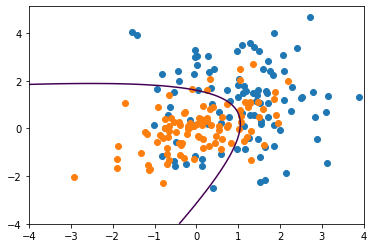

In [22]:
x0 = test[test['y'] == -1][0]
y0 = test[test['y'] == -1][1]
plt.scatter(x0, y0)
x1 = test[test['y'] == 1][0]
y1 = test[test['y'] == 1][1]
plt.scatter(x1, y1)

X, Y = np.mgrid[-4:4:100j, -4:4:100j]
x = X.ravel()
y = Y.ravel()
p = (mnorm(mu1.T[0], sigma1).pdf(np.column_stack((x, y))) - mnorm(mu0.T[0], sigma0).pdf(np.column_stack((x, y)))).reshape(X.shape)
plt.contour(X, Y, p, levels = [0])

Nearest Neighbor Classifier on Test Set

In [23]:
from scipy.spatial.distance import cdist

In [24]:
def closest_point(point, points):
    """ Find closest point from a list of points. """
    return points[cdist([point], points).argmin()]

def match_value(df, col1, x, col2):
    """ Match value x from col1 row to value in col2. """
    return df[df[col1] == x][col2].values[0]

In [25]:
train['feature'] = train.iloc[:, 0:D].apply(tuple, axis=1)

In [26]:
test['feature'] = test.iloc[:, 0:D].apply(tuple, axis=1)

In [27]:
test['closest'] = [closest_point(x, list(train['feature'])) for x in test['feature']]
test['predicted_nn'] = [match_value(train, 'feature', x, 'y') for x in test['closest']]

In [28]:
y_nn_pred = test.iloc[:, [-1]]

In [29]:
predictions_nn_test = np.array(y_nn_pred) == np.array(y)

In [30]:
true_count = (predictions_nn_test[:, 0] == True).sum()
false_count = (predictions_nn_test[:, 0] == False).sum()
accuracy = true_count/(total) * 100
print(true_count, false_count)
print('Accuracy = ' + str(accuracy) + '%')

200 0
Accuracy = 100.0%
